Import Libraries

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pickle

Load Dataset

In [10]:

# Set the path to your dataset
dataset_path = 'Resized_Indian'

# Initialize lists to hold images and labels
images = []
labels = []

# Loop through each subdirectory in the dataset
for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            # Load the image
            image = cv2.imread(image_path)
            # Resize the image to a fixed size (e.g., 64x64)
            image = cv2.resize(image, (64, 64))
    
            
            images.append(image)
            labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)






Balancing Dataset

In [19]:
import numpy as np
from collections import Counter

# Count the number of samples per class
class_counts = Counter(labels)
min_samples = min(class_counts.values())

# Initialize lists for balanced dataset
balanced_images = []
balanced_labels = []

# Downsample each class
for class_label in np.unique(labels):
    # Get indices of all images for this class
    class_indices = np.where(labels == class_label)[0]
    
    # Debugging: Print the number of samples per class
    print(f"Class {class_label} has {len(class_indices)} samples.")

    # Skip classes that have no samples
    if len(class_indices) == 0:
        print(f"No samples found for class {class_label}. Skipping...")
        continue
     
    # If the class has fewer samples than the min_samples, select all available samples
    if len(class_indices) < min_samples:
        print(f"Class {class_label} has fewer samples than the minimum. Using all available samples.")
        selected_indices = class_indices
    else:
        # Randomly select min_samples images for this class
        selected_indices = np.random.choice(class_indices, min_samples, replace=False)
    
    # Debugging: Check how many indices are selected
    print(f"Class {class_label}: Selected {len(selected_indices)} samples.")

    # Append the selected images and labels to the balanced dataset
    balanced_images.extend(images[selected_indices])
    balanced_labels.extend(labels[selected_indices])

# Convert lists to numpy arrays
balanced_images = np.array(balanced_images)
balanced_labels = np.array(balanced_labels)

# Now you can access .shape without error
print("Balanced dataset shape:", balanced_images.shape, balanced_labels.shape)       

Class 1 has 1200 samples.
Class 1: Selected 1200 samples.
Class 2 has 1200 samples.
Class 2: Selected 1200 samples.
Class 3 has 1200 samples.
Class 3: Selected 1200 samples.
Class 4 has 1200 samples.
Class 4: Selected 1200 samples.
Class 5 has 1200 samples.
Class 5: Selected 1200 samples.
Class 6 has 1200 samples.
Class 6: Selected 1200 samples.
Class 7 has 1200 samples.
Class 7: Selected 1200 samples.
Class 8 has 1200 samples.
Class 8: Selected 1200 samples.
Class 9 has 1200 samples.
Class 9: Selected 1200 samples.
Class A has 1200 samples.
Class A: Selected 1200 samples.
Class B has 1200 samples.
Class B: Selected 1200 samples.
Class C has 1447 samples.
Class C: Selected 1200 samples.
Class D has 1200 samples.
Class D: Selected 1200 samples.
Class E has 1200 samples.
Class E: Selected 1200 samples.
Class F has 1200 samples.
Class F: Selected 1200 samples.
Class G has 1200 samples.
Class G: Selected 1200 samples.
Class H has 1200 samples.
Class H: Selected 1200 samples.
Class I has 13

Encodind And Splitting Dataset

In [22]:
# Encode labels to integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# One-hot encode the labels
num_classes = 35
labels = to_categorical(labels, num_classes)

# Normalize the images
images = images.astype('float32') / 255.0

# Split the dataset into training and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

Loading Dataset

In [25]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('sign_language_model.h5')


Image Augumentation And Evaluation of model

In [28]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the test dataset directory
test_dir = r"C:\Users\suman\OneDrive\Desktop\sign language\Real-Time-Recognition-of-Indian-Sign-Language-master\train_processed"

# Preprocessing the test data
img_size = (64, 64)
datagen = ImageDataGenerator(rescale=1.0/255.0)

test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_gen)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Found 34195 images belonging to 35 classes.


C:\Users\suman\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1069/1069 ━━━━━━━━━━━━━━━━━━━━ 273s 255ms/step - accuracy: 0.9994 - loss: 0.1458
Test Accuracy: 99.89%


Testing

In [31]:
import cv2

# Load and preprocess an image
img_path = r"C:\Users\suman\OneDrive\Desktop\Mini project\Resized_Indian\5\0.jpg"
img = cv2.imread(img_path)
img = cv2.resize(img, (64, 64))
img = img / 255.0
img = np.expand_dims(img, axis=0)

# Make a prediction
predictions = model.predict(img)
class_index = np.argmax(predictions, axis=1)[0]

# Map the prediction to the label
class_labels =['1' ,'2', '3' ,'4' ,'5' ,'6', '7', '8', '9', 'A' ,'B', 'C' ,'D' ,'E', 'F', 'G' ,'H' ,'I',
 'J' ,'K', 'L' ,'M', 'N' ,'O', 'P', 'Q', 'R' ,'S' ,'T' ,'U', 'V' ,'W' ,'X', 'Y', 'Z']  # Replace with your labels
predicted_label = class_labels[class_index]

print(f"Predicted Label: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted Label: 5


Image Display with Predicted Label

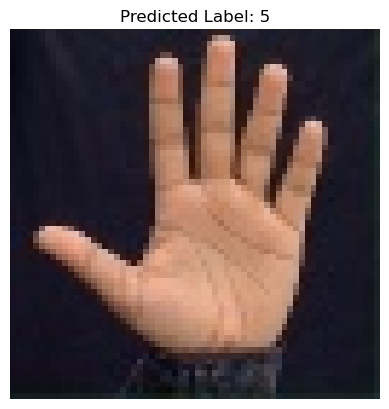

In [34]:
import matplotlib.pyplot as plt

# Display the test image and its prediction
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()


Evaluation

1069/1069 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step


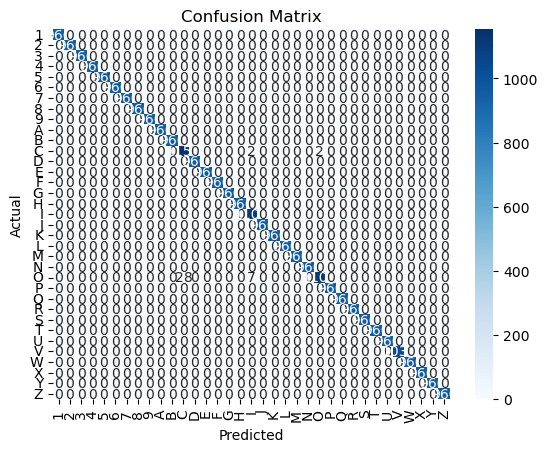

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       960
           2       1.00      1.00      1.00       960
           3       1.00      1.00      1.00       960
           4       1.00      1.00      1.00       960
           5       1.00      1.00      1.00       960
           6       1.00      1.00      1.00       960
           7       1.00      1.00      1.00       960
           8       1.00      1.00      1.00       960
           9       1.00      1.00      1.00       960
           A       1.00      1.00      1.00       960
           B       1.00      1.00      1.00       960
           C       0.98      1.00      0.99      1157
           D       1.00      1.00      1.00       960
           E       1.00      1.00      1.00       960
           F       1.00      1.00      1.00       960
           G       1.00      1.00      1.00       960
           H       1.00      1.00      1.00       960
           I       0.99    

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get ground truth and predictions
y_true = test_gen.classes
y_pred = np.argmax(model.predict(test_gen), axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_gen.class_indices.keys(), yticklabels=test_gen.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=test_gen.class_indices.keys()))
